In [8]:
import os
from os.path import join as pjoin
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy import linalg as LA
from math import sqrt
from matplotlib import pyplot as plt
import cv2
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)

def imread(imgpath):
    return cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)
 
def imshow(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [2]:
imgdir = 'images'
filename = pjoin(imgdir, 'img_or.jpg')
img = cv2.cvtColor(imread(filename), cv2.COLOR_RGB2GRAY)
# cv2.imwrite('img.jpg', img)
# imshow(img, 'gray')

In [3]:
U, S, VT = LA.svd(img)

In [6]:
ks = [1,2,5,10,20,50,90,500,600]
qualities = []
sizes = []
for k in ks:
    Ss = np.eye(k)*S[:k]
    img_low = U[:,:k].dot(Ss).dot(VT[:k,:])
    quality = LA.norm(img) - LA.norm(img-img_low)
    qualities.append(quality)
#     imshow(img_low, 'gray')
    filename = pjoin(imgdir, 'img{:02}.jpg'.format(k))
#     cv2.imwrite(filename, img_low)
    sizes.append(os.stat(filename).st_size)

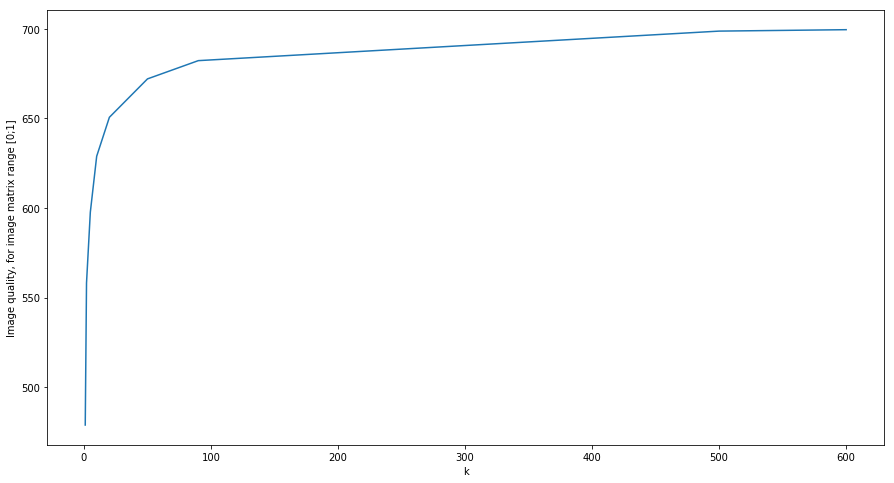

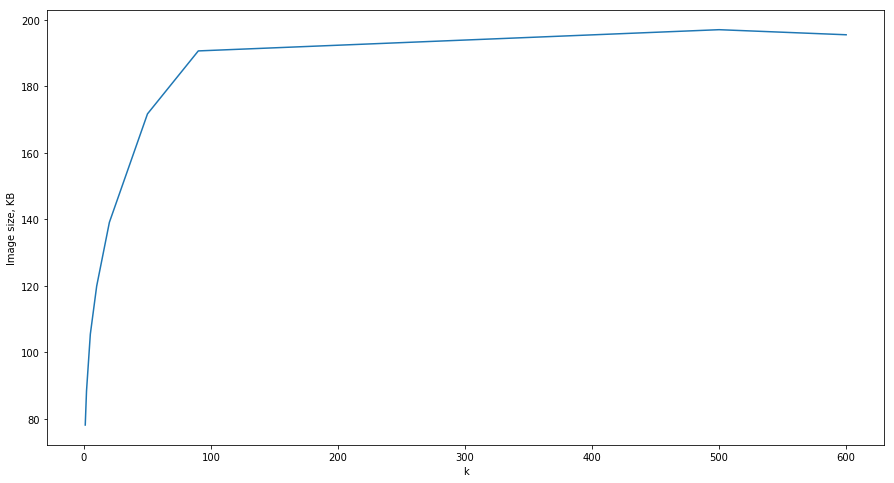

In [7]:
mpl.rcParams['figure.figsize'] = (15,8)
plt.plot(ks, np.array(qualities)/255)
plt.xlabel('k')
plt.ylabel('Image quality, for image matrix range [0;1]')
plt.show()

plt.plot(ks, np.array(sizes)/1024)
plt.xlabel('k')
plt.ylabel('Image size, KB')
plt.show()